# Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

***
Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

***



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
fraud_df = pd.read_csv('Fraud_check.csv')

In [3]:
fraud_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [4]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud_df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
fraud_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


# Removing City.Population column as its is not required

In [7]:
fraud_check_df= fraud_df.drop(['City.Population'], axis = 1)
fraud_check_df

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO
...,...,...,...,...,...
595,YES,Divorced,76340,7,YES
596,YES,Divorced,69967,2,YES
597,NO,Divorced,47334,0,YES
598,YES,Married,98592,17,NO


# Adding a column for categorising those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [8]:
fraud_check_df['chk_taxability'] = " "
fraud_check_df

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,chk_taxability
0,NO,Single,68833,10,YES,
1,YES,Divorced,33700,18,YES,
2,NO,Married,36925,30,YES,
3,YES,Single,50190,15,YES,
4,NO,Married,81002,28,NO,
...,...,...,...,...,...,...
595,YES,Divorced,76340,7,YES,
596,YES,Divorced,69967,2,YES,
597,NO,Divorced,47334,0,YES,
598,YES,Married,98592,17,NO,


In [9]:
fraud_check_df['chk_taxability']=pd.cut(fraud_check_df['Taxable.Income'],bins=[0,30000,1000000],labels=['risky','good'])

In [10]:
fraud_check_df

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,chk_taxability
0,NO,Single,68833,10,YES,good
1,YES,Divorced,33700,18,YES,good
2,NO,Married,36925,30,YES,good
3,YES,Single,50190,15,YES,good
4,NO,Married,81002,28,NO,good
...,...,...,...,...,...,...
595,YES,Divorced,76340,7,YES,good
596,YES,Divorced,69967,2,YES,good
597,NO,Divorced,47334,0,YES,good
598,YES,Married,98592,17,NO,good


In [11]:
fraud_check_df['chk_taxability'].value_counts()

good     476
risky    124
Name: chk_taxability, dtype: int64

In [12]:
fraud_check_df[fraud_check_df['chk_taxability']=='risky']

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,chk_taxability
10,NO,Single,29732,19,YES,risky
12,NO,Divorced,11794,14,YES,risky
16,YES,Divorced,24987,29,NO,risky
19,NO,Single,10987,30,YES,risky
21,YES,Divorced,14310,7,YES,risky
...,...,...,...,...,...,...
544,NO,Single,29916,21,YES,risky
557,YES,Married,12810,10,NO,risky
567,YES,Single,16316,30,NO,risky
575,NO,Divorced,10735,13,YES,risky


In [13]:
fraud_check_df_bkup = fraud_check_df.copy()

In [14]:
fraud_check_df.drop('Taxable.Income',axis=1)

,Undergrad,Marital.Status,Work.Experience,Urban,chk_taxability
0,NO,Single,10,YES,good
1,YES,Divorced,18,YES,good
2,NO,Married,30,YES,good
3,YES,Single,15,YES,good
4,NO,Married,28,NO,good
...,...,...,...,...,...
595,YES,Divorced,7,YES,good
596,YES,Divorced,2,YES,good
597,NO,Divorced,0,YES,good
598,YES,Married,17,NO,good


# Converting Categorical Values into Integer Values

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [16]:
fraud_check_df['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [17]:
fraud_check_df['Undergrad'] = label_encoder.fit_transform(fraud_check_df['Undergrad'])

In [18]:
fraud_check_df

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,chk_taxability
0,0,Single,68833,10,YES,good
1,1,Divorced,33700,18,YES,good
2,0,Married,36925,30,YES,good
3,1,Single,50190,15,YES,good
4,0,Married,81002,28,NO,good
...,...,...,...,...,...,...
595,1,Divorced,76340,7,YES,good
596,1,Divorced,69967,2,YES,good
597,0,Divorced,47334,0,YES,good
598,1,Married,98592,17,NO,good


In [19]:
fraud_check_df['Undergrad'].value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

In [20]:
fraud_check_df['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [21]:
fraud_check_df['Marital.Status'] = label_encoder.fit_transform(fraud_check_df['Marital.Status'])
fraud_check_df

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,chk_taxability
0,0,2,68833,10,YES,good
1,1,0,33700,18,YES,good
2,0,1,36925,30,YES,good
3,1,2,50190,15,YES,good
4,0,1,81002,28,NO,good
...,...,...,...,...,...,...
595,1,0,76340,7,YES,good
596,1,0,69967,2,YES,good
597,0,0,47334,0,YES,good
598,1,1,98592,17,NO,good


In [22]:
fraud_check_df['Marital.Status'].value_counts()

2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [23]:
fraud_check_df['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [24]:
fraud_check_df['Urban'] = label_encoder.fit_transform(fraud_check_df['Urban'])
fraud_check_df

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,chk_taxability
0,0,2,68833,10,1,good
1,1,0,33700,18,1,good
2,0,1,36925,30,1,good
3,1,2,50190,15,1,good
4,0,1,81002,28,0,good
...,...,...,...,...,...,...
595,1,0,76340,7,1,good
596,1,0,69967,2,1,good
597,0,0,47334,0,1,good
598,1,1,98592,17,0,good


In [25]:
fraud_check_df['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [26]:
fraud_check_df['chk_taxability'].value_counts()

good     476
risky    124
Name: chk_taxability, dtype: int64

In [27]:
fraud_check_df['chk_taxability'] = label_encoder.fit_transform(fraud_check_df['chk_taxability'])
fraud_check_df

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,chk_taxability
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0
...,...,...,...,...,...,...
595,1,0,76340,7,1,0
596,1,0,69967,2,1,0
597,0,0,47334,0,1,0
598,1,1,98592,17,0,0


In [28]:
fraud_check_df['chk_taxability'].value_counts()

0    476
1    124
Name: chk_taxability, dtype: int64

# Data Visualisation

In [29]:
fraud_check_df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'Work.Experience',
       'Urban', 'chk_taxability'],
      dtype='object')

<AxesSubplot:xlabel='Undergrad'>

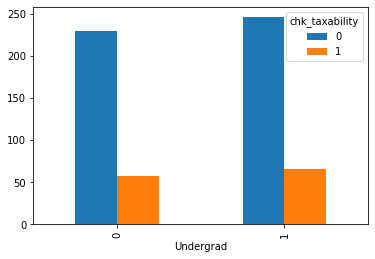

In [30]:
cross_tab_undergrad =pd.crosstab(index=fraud_check_df['Undergrad'],columns=fraud_check_df['chk_taxability'])
cross_tab_undergrad.plot.bar()

<AxesSubplot:xlabel='Marital.Status'>

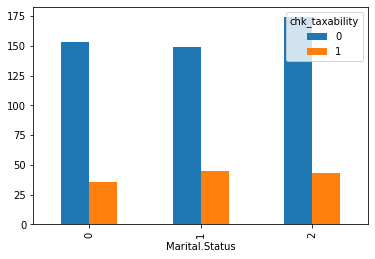

In [31]:
cross_tab_marr_status =pd.crosstab(index=fraud_check_df['Marital.Status'],columns=fraud_check_df['chk_taxability'])
cross_tab_marr_status.plot.bar()

<AxesSubplot:xlabel='Urban'>

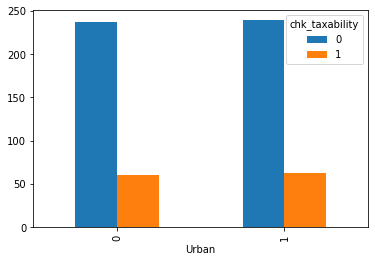

In [32]:
cross_tab_urban =pd.crosstab(index=fraud_check_df['Urban'],columns=fraud_check_df['chk_taxability'])
cross_tab_urban.plot.bar()

<AxesSubplot:xlabel='chk_taxability', ylabel='Work.Experience'>

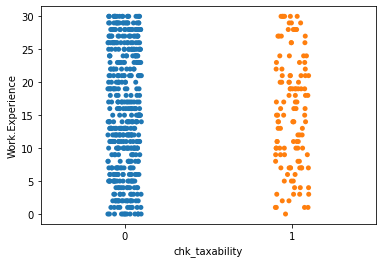

In [33]:
sns.stripplot(data=fraud_check_df,x=fraud_check_df['chk_taxability'],y=fraud_check_df['Work.Experience'])

# Data Scaling 

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing


In [35]:
fraud_check_df.iloc[:,2:4]=StandardScaler().fit_transform(fraud_check_df.iloc[:,2:4])
fraud_check_df

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,chk_taxability
0,0,2,0.520362,-0.629143,1,0
1,1,0,-0.821464,0.276370,1,0
2,0,1,-0.698292,1.634639,1,0
3,1,2,-0.191666,-0.063197,1,0
4,0,1,0.985129,1.408261,0,0
...,...,...,...,...,...,...
595,1,0,0.807075,-0.968710,1,0
596,1,0,0.563672,-1.534655,1,0
597,0,0,-0.300744,-1.761033,1,0
598,1,1,1.656940,0.163181,0,0


# Spliting The DataSet

In [36]:
x= fraud_check_df.iloc[:,0:5]
x

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,0,2,0.520362,-0.629143,1
1,1,0,-0.821464,0.276370,1
2,0,1,-0.698292,1.634639,1
3,1,2,-0.191666,-0.063197,1
4,0,1,0.985129,1.408261,0
...,...,...,...,...,...
595,1,0,0.807075,-0.968710,1
596,1,0,0.563672,-1.534655,1
597,0,0,-0.300744,-1.761033,1
598,1,1,1.656940,0.163181,0


In [37]:
y = fraud_check_df['chk_taxability']
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: chk_taxability, Length: 600, dtype: int32

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [39]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(420, 5) (180, 5) (420,) (180,)


# Model Building using RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier 

In [41]:
model_1=RandomForestClassifier()
model_1.fit(x_train,y_train)
pred=model_1.predict(x_test)
print(np.mean(y_test==pred))

0.9944444444444445


# Using Grid Search

In [42]:
model_2=RandomForestClassifier(criterion='gini',max_depth=1,max_leaf_nodes=2,n_estimators=10)
model_2.fit(x,y)
pred=model_2.predict(x)
print(np.mean(y==pred))

1.0


In [43]:
model_2=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
model_2.fit(x_train,y_train)
pred=model_2.predict(x_train)
print(np.mean(y_train==pred))

1.0


# K-Fold Validation

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10)
results=cross_val_score(model_2,x,y,cv=kfold)
print(results.mean())

0.9983333333333334


# Bagging

In [45]:
model_3=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=model_3)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.9983333333333334


# Boosting

In [46]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(base_estimator=model_2)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.9983333333333334
